In [1]:
# Import the important libraries


# Data Loading and Initial Inspection

In [2]:
# Import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the dataset
df = pd.read_csv('/kaggle/input/google-googl-financial-news-from-2000-to-today/Google_Daily_News.csv')

df

,category,datetime,headline,id,image,related,source,summary,url
0,company,1745449200,"Alphabet earnings, Fed comments, Nintendo Swit...",134059226,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,GOOGL,Yahoo,Here's what investors are watching on Thursday...,https://finnhub.io/api/news?id=5381fda0f641074...
1,company,1745446095,Is Alphabet Inc. (GOOGL) the Best Stock to Buy...,134059227,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,GOOGL,Yahoo,We recently published a list of 10 Best Stocks...,https://finnhub.io/api/news?id=bdc5b5103ae73db...
2,company,1745442355,Is Alphabet Inc. (GOOG) the Best Stock to Buy ...,134059228,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,GOOGL,Yahoo,We recently published a list of 20 Best Stocks...,https://finnhub.io/api/news?id=8cdf3969c1ec9e3...
3,company,1745440328,Google earnings are coming today. Here's what ...,134059229,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,GOOGL,Yahoo,Google (GOOGL) will report first-quarter 2025 ...,https://finnhub.io/api/news?id=ed468a233b607bd...
4,company,1745439372,Equity Markets Close Higher Over Potential Red...,134059230,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,GOOGL,Yahoo,US benchmark equity indexes closed higher on W...,https://finnhub.io/api/news?id=54bdad840d13d87...
...,...,...,...,...,...,...,...,...,...
226,company,1744828750,"Temu, Shein slash digital ads as tariffs end c...",133938138,NaN,GOOGL,Finnhub,Chinese online marketplace Temu and fast-fashi...,https://finnhub.io/api/news?id=102f1c3f6a168e2...
227,company,1744825027,Communications Services Slide on Flight From R...,133937668,NaN,GOOGL,Finnhub,Communications-services companies slid as trad...,https://finnhub.io/api/news?id=7f3caaad7cfb8bd...
228,company,1744823999,Prominent Investor Unloads His GOOG Stock,133942438,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,GOOGL,Yahoo,Well-known investor Josh Brown disclosed on CN...,https://finnhub.io/api/news?id=b6947c8f36b7430...
229,company,1744822824,Is Alphabet Inc. (NASDAQ:GOOGL) the Best Machi...,133935539,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,GOOGL,Yahoo,We recently published a list of the 10 Best Ma...,https://finnhub.io/api/news?id=1c2d2e437dd6a2f...


In [3]:
# Display First Five Rows
print(df.head(5))

  category    datetime                                           headline  \
0  company  1745449200  Alphabet earnings, Fed comments, Nintendo Swit...   
1  company  1745446095  Is Alphabet Inc. (GOOGL) the Best Stock to Buy...   
2  company  1745442355  Is Alphabet Inc. (GOOG) the Best Stock to Buy ...   
3  company  1745440328  Google earnings are coming today. Here's what ...   
4  company  1745439372  Equity Markets Close Higher Over Potential Red...   

          id                                              image related  \
0  134059226  https://s.yimg.com/rz/stage/p/yahoo_finance_en...   GOOGL   
1  134059227  https://s.yimg.com/rz/stage/p/yahoo_finance_en...   GOOGL   
2  134059228  https://s.yimg.com/rz/stage/p/yahoo_finance_en...   GOOGL   
3  134059229  https://s.yimg.com/rz/stage/p/yahoo_finance_en...   GOOGL   
4  134059230  https://s.yimg.com/rz/stage/p/yahoo_finance_en...   GOOGL   

  source                                            summary  \
0  Yahoo  Here's what i

In [4]:
# Check for the basics info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  231 non-null    object
 1   datetime  231 non-null    int64 
 2   headline  231 non-null    object
 3   id        231 non-null    int64 
 4   image     158 non-null    object
 5   related   231 non-null    object
 6   source    231 non-null    object
 7   summary   190 non-null    object
 8   url       231 non-null    object
dtypes: int64(2), object(7)
memory usage: 16.4+ KB


In [5]:
# Check for missing values
df.isnull().sum()

category     0
datetime     0
headline     0
id           0
image       73
related      0
source       0
summary     41
url          0
dtype: int64

In [6]:
# Check uniquie values in categorical columns
df['category'].value_counts()

category
company    231
Name: count, dtype: int64

# Data Cleaning


In [7]:
# Convert UNIX timestamp to datetime
df['date'] = pd.to_datetime(df['datetime'], unit='ms')

# Drop unnecessary columns
# df.drop(['id', 'image', 'url'], axis=1, inplace=True)

# Handling missing summaries (fill with headlines if missing)
df['summary'].fillna(df['headline'], inplace=True)

# Check the duplicates 
print("\nDuplicates Rows:", df.duplicated().sum())

# Clean text data (remove special character, lowercase)
import re
def clean_text(text):
    text = re.sub(r'[^a-zA-Z0-0\s]', '', str(text))
    text = text.lower()
    return text


df['cleaned_headline'] = df['headline'].apply(clean_text)
df['cleaned_summary'] = df['summary'].apply(clean_text)

print("\nCleaned Data Sample:")
print(df[['cleaned_headline', 'cleaned_summary']].head())






Duplicates Rows: 0

Cleaned Data Sample:
                                    cleaned_headline  \
0  alphabet earnings fed comments nintendo switch...   
1  is alphabet inc googl the best stock to buy an...   
2  is alphabet inc goog the best stock to buy acc...   
3  google earnings are coming today heres what to...   
4  equity markets close higher over potential red...   

                                     cleaned_summary  
0  heres what investors are watching on thursday ...  
1  we recently published a list of 0 best stocks ...  
2  we recently published a list of 0 best stocks ...  
3  google googl will report firstquarter 0 earnin...  
4  us benchmark equity indexes closed higher on w...  


/tmp/ipykernel_13/119504869.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['summary'].fillna(df['headline'], inplace=True)


# Exploratory Data Analysis(EDA)

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


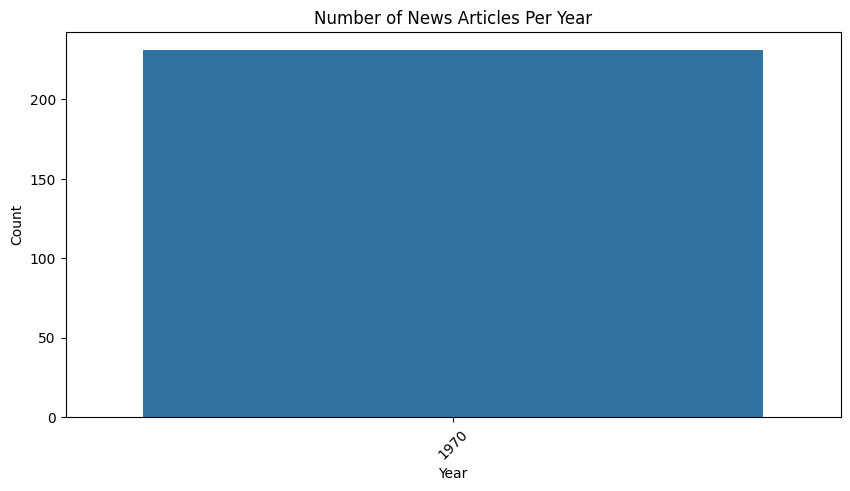

In [8]:


# Plot news count per year
df['year'] = df['date'].dt.year
news_per_year = df['year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=news_per_year.index, y = news_per_year.values)
plt.title("Number of News Articles Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()